In [2]:
import copy
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

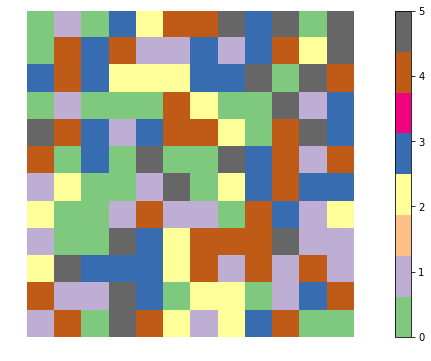

In [112]:
SIZE=12
COLOURS=6

def gameboard():
    random_board = [[random.randrange(COLOURS) for _ in range(SIZE)] for _ in range(SIZE)]
    if 0 == random.randrange(2):
        random_board[0][1] = random_board[0][0]
    else:
        random_board[1][0] = random_board[0][0]
    return random_board

def display_c(board):
    plt.figure(2)
    plt.colorbar(
        display(board),
    )

def display(board):
    plt.axis('off')
    return plt.imshow(board, cmap='Accent')

START=gameboard()
display_c(START)

In [105]:
def adjacents(pos):
    x, y = pos

    if x > 0:
        yield (x-1, y)
    if y > 0:
        yield (x, y-1)
    if x < SIZE-1:
        yield (x+1, y)
    if y < SIZE-1:
        yield (x, y+1)

MARKER = -1
def mark_flood(board):
    src = board[0][0]

    board = copy.deepcopy(board)
    todo = list(adjacents((0, 0)))
    while todo:
        us = todo.pop()
        if board[us[0]][us[1]] != src:
            continue
        todo.extend(adjacents(us))
        board[us[0]][us[1]] = MARKER

    return board

def marked_replace(board, target: int):
    return [[target if MARKER == x else x for x in y] for y in board]

def marked_score(board):
    return sum(sum(1 for x in y if MARKER == x) for y in board)

def remaining_colours(board):
    return len(set(j for i in board for j in i))


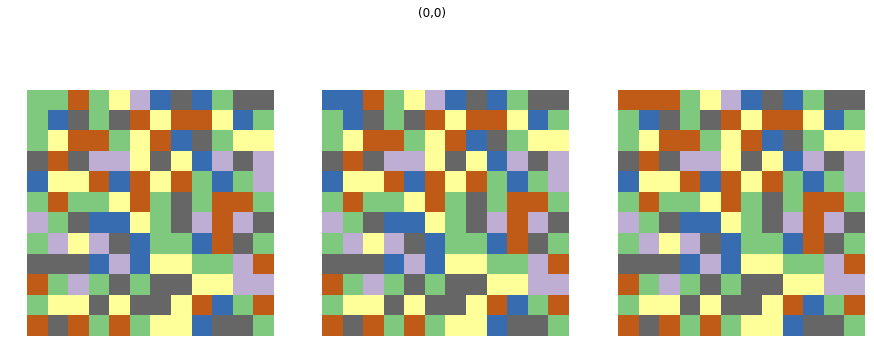

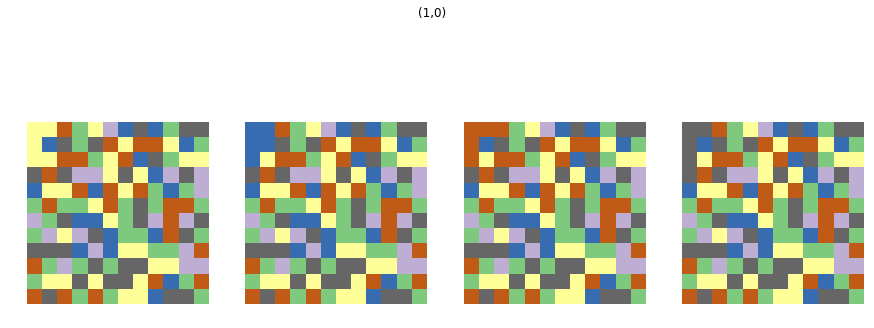

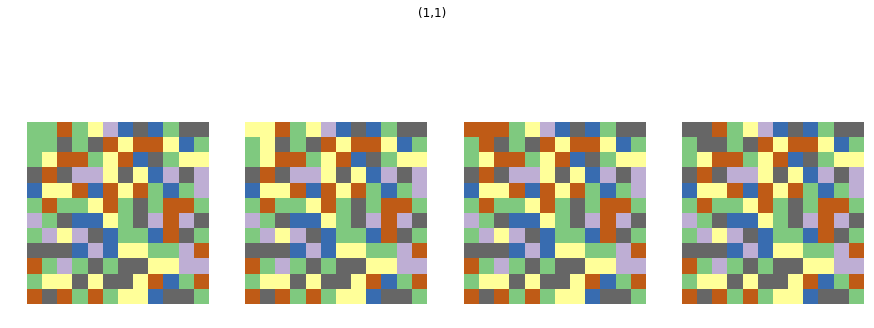

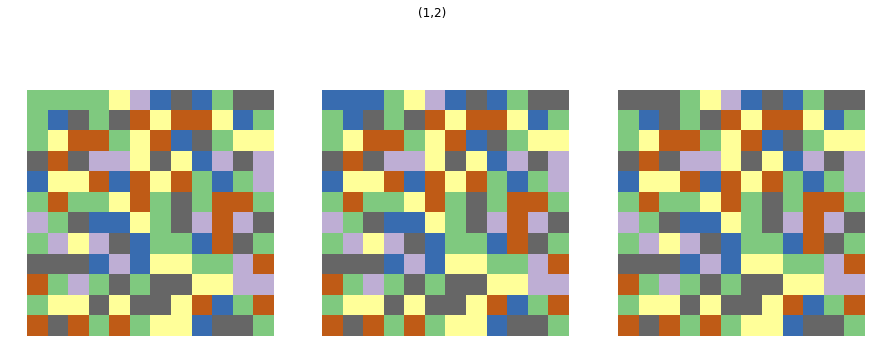

In [81]:
def step(board):
    marked = mark_flood(board)
    init_score = marked_score(marked)
    for i in range(COLOURS):
        if i == board[0][0]:
            continue
        cand = marked_replace(marked, i)
        new_score = marked_score(mark_flood(cand))
        if new_score <= init_score:
            continue

        yield (new_score, cand)

def display_step(s):
    for i in range(len(s)):
        plt.subplot(1, len(s), 1+i)
        display(s[i][1])

first = list(step(START))
plt.suptitle('(0,0)')
display_step(first)
for i, x in enumerate(first):
    a = list(step(x[1]))
    plt.figure()
    plt.suptitle('(1,{})'.format(i))
    display_step(a)

In [106]:
import heapq

def walk(start):
    best_moves = 23
    todo = []
    heapq.heappush(todo, (0, [], start))
    while todo:
        _, moves, board = heapq.heappop(todo)

        # todo: >=?
        if len(moves) + remaining_colours(board) > best_moves:
            continue

        for score, item in step(board):
            solution = moves + [item[0][0]]
            if score == (SIZE*SIZE):
                best_moves = len(solution)
                yield (len(todo), solution)
                break
            heapq.heappush(todo, (-score/len(solution), solution, item))
               
# renderer for "todo"
#for score, moves, f in walk(START):
#    plt.figure()
#    plt.suptitle('{}: {} ({})'.format(-score, moves, len(moves)))
#    display(f)



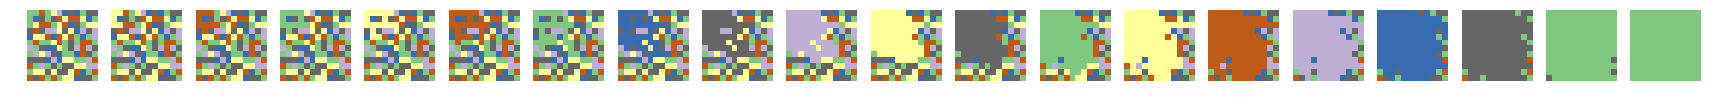

In [91]:
def render_result(board, result):
    for (i, move) in enumerate(result):
        plt.subplot(1, len(result), 1+i)
        board = marked_replace(mark_flood(board), move)
        display(board)

20: [4, 3, 0, 3, 0, 1, 2, 4, 1, 3, 0, 4, 5, 2, 1, 3, 4, 5, 0, 2] (185)
18: [4, 3, 0, 3, 0, 1, 2, 3, 5, 0, 4, 3, 2, 5, 1, 4, 0, 3] (317)
16: [4, 3, 0, 2, 3, 0, 3, 4, 1, 4, 3, 4, 5, 2, 0, 1] (3702)


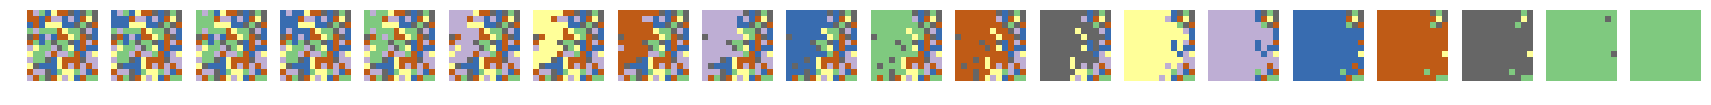

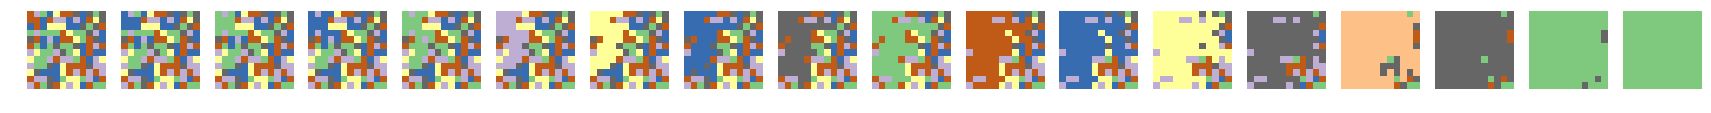

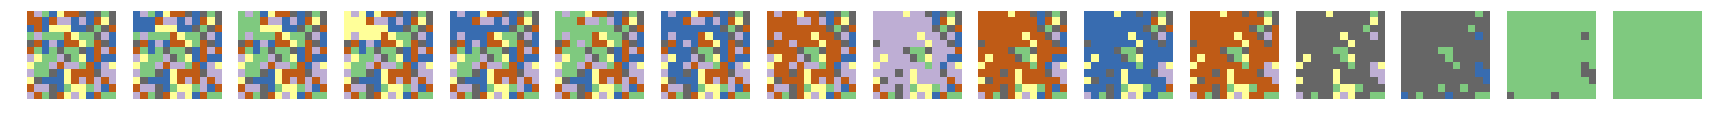

In [113]:
for remaining, best in walk(START):
    _ = plt.figure(figsize=(30, 5))
    status = '{}: {} ({})'.format(len(best), best, remaining)
    plt.suptitle(status)
    print(status)
    render_result(START, best)